In [2]:
%load_ext autoreload
%autoreload 2

from misc import *
import numpy as np
import matplotlib.pyplot as plt 
from tqdm import tqdm 
import os 
from tqdm import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from integrations import RK4

In [35]:
def f(t,x,parameters=None):
    return np.zeros(x.shape)#np.cos(parameters[0]*t)*parameters[0]

In [36]:
def g(t,x,parameters=None):
    w = np.random.random()
    return np.random.randn(1)

In [44]:
dt = 1e-5
T = 10
times = np.arange(0,T+dt,dt)
parameters = [2*np.pi,dt]
np.random.seed(0)
result = np.zeros(len(times))
for ind, t in enumerate(tqdm(times[:-1])):
    integration_result = RK4(result[ind], t, dt, f, g, parameters)
    result[ind+1] = integration_result

100%|██████████| 1000000/1000000 [01:04<00:00, 15562.07it/s]


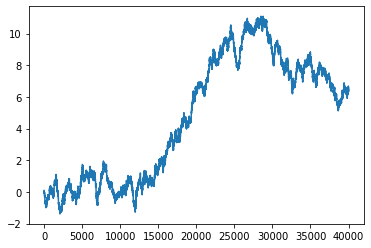

In [38]:
plt.plot(result)

In [45]:
np.diag([1,1])

array([[1, 0],
       [0, 1]])

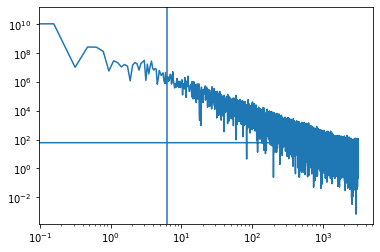

In [25]:
freqs = np.fft.fftfreq(len(times),d=dt)
ax = plt.subplot(111)
ax.plot(2*np.pi*freqs[:-1], np.abs(np.fft.fft(result[:-1]))**2)
ax.axvline(2*np.pi)
ax.set_xscale("log")
ax.set_yscale("log")

Integrate our functions 

In [201]:
means, covs, signals, [A,C,dt,D] = load_data(periods=40, ppp=500, itraj=1)

In [340]:
from scipy.integrate import solve_ivp

def vector_to_matrix(v):
    return np.array([[v[0], v[1]],[v[2], v[3]]])
def matrix_to_vector(v):
    return np.array([v[0,0], v[0,1], v[1,0], v[1,1]])



gamma = 1 #damping from outside
Gamma = 1 #measurement rate
eta = 1 # measurement efficiency
n = 2 # number of photons

w = 2*np.pi
T = (2*np.pi)/w

dt = 1/ppp

C = np.array([[np.sqrt(4*eta*Gamma), 0] ,[0, np.sqrt(4*eta*Gamma)]])

A = np.array([
    [0., w],
    [-w, 0.]])

D = np.array([[gamma*(n + 0.5) + Gamma, 0], [0,gamma*(n + 0.5) + Gamma]])

su = n + 0.5 + Gamma/gamma
cov_in = np.array([[np.sqrt(1+ (16*eta*Gamma*su/gamma) -1)*gamma/(8*eta*Gamma), 0],
                   [0,np.sqrt(1+ (16*eta*Gamma*su/gamma) -1)*gamma/(8*eta*Gamma)]]) #np.ones((2,2))

xi = lambda cov: np.dot(cov, ct(C)) + ct(D)

In [345]:
periods = 1000
ppp = 500
dt = 1/ppp
times = np.linspace(0,periods, int(ppp*periods))

def dcovdt(t,cov):
    cov= vector_to_matrix(cov)
    XiCov = xi(cov)
    ev_cov = np.dot(A,cov) + np.dot(cov, ct(A)) + D - np.dot(XiCov, ct(XiCov))
    return matrix_to_vector(ev_cov)


integrate_cov = solve_ivp(dcovdt, y0=matrix_to_vector(cov_in), t_span=(0,times[-1]), t_eval=times, max_step = dt, atol=1, rtol=1)
covs = np.reshape(integrate_cov.y.T, (len(times),2,2))

In [346]:
np.random.seed(1)

def f(t,x,parameters=None):
    return np.dot(A, x)

xi = lambda cov: np.dot(cov, ct(C)) + ct(D)
def g(t,x,parameters=None):
    gg = np.dot(xi(covs[parameters]),[np.random.normal(), np.random.normal()])
    return gg

result = np.zeros((len(times),2))
result[0] = np.array([1.,0.])
for ind, t in enumerate(tqdm(times[:-1])):
    ss = RK4(result[ind], t, dt, f, g, parameters=ind)
    result[ind+1] = ss

100%|██████████| 499999/499999 [01:16<00:00, 6566.93it/s]


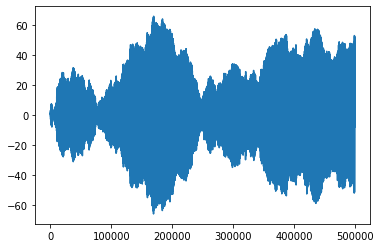

In [347]:
plt.plot(result[:,0])

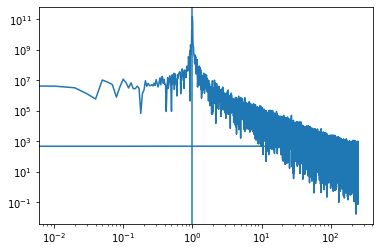

In [337]:
freqs = np.fft.fftfreq(len(times),d=dt)
ax = plt.subplot(111)
ax.plot(freqs, np.abs(np.fft.fft(result[:,1]))**2)
omega = 2*np.pi
period = 2*np.pi/omega
ax.axvline(1/period)
ax.set_xscale("log")
ax.set_yscale("log")

In [235]:
import os 

In [350]:
os.system("python3 traj.py --method RK --ppp 500 --periods 1000 --itraj 1")

0

In [351]:
os.system("python3 traj.py --method euler --ppp 500 --periods 1000 --itraj 1")

0

In [28]:
means, covvs, signals, [A,C,dt,D] = load_data(periods=100, ppp=500, itraj=1)

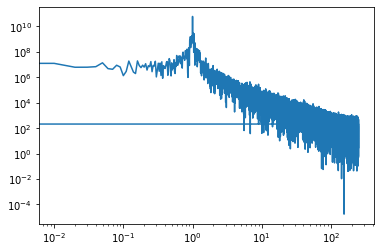

In [34]:
freqs = np.fft.fftfreq(len(signals),d=1/500)
ax = plt.subplot(111)
ax.plot(freqs, np.abs(np.fft.fft(means[:-1][:,1]))**2)
omega = 2*np.pi
period = 2*np.pi/omega
#ax.axvline(1/period)
ax.set_xscale("log")
ax.set_yscale("log")